<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


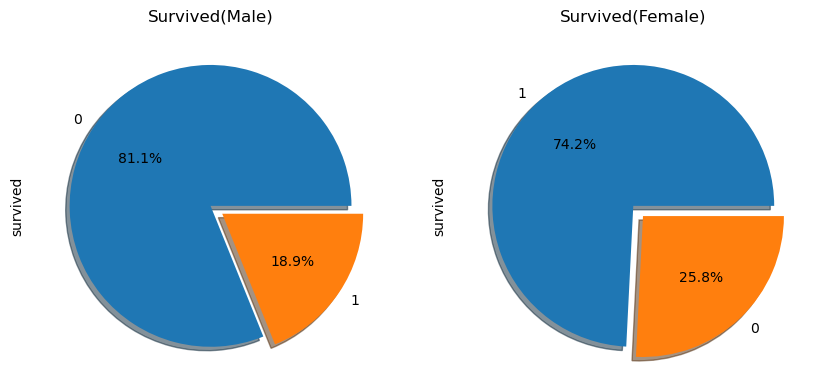

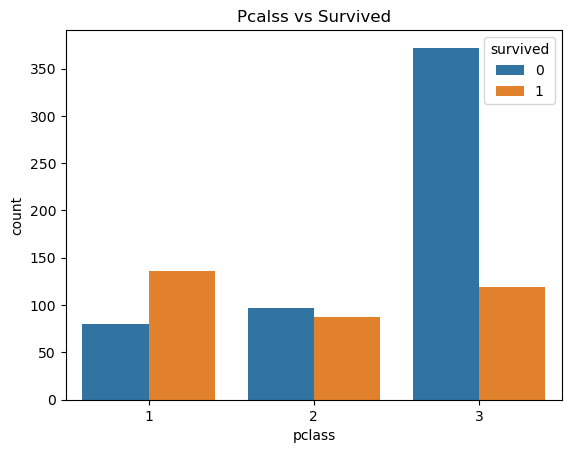

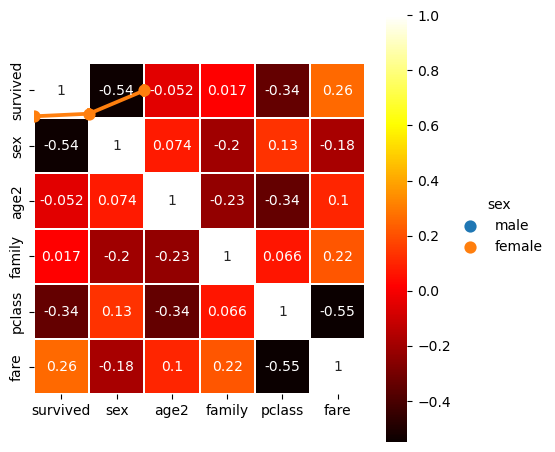

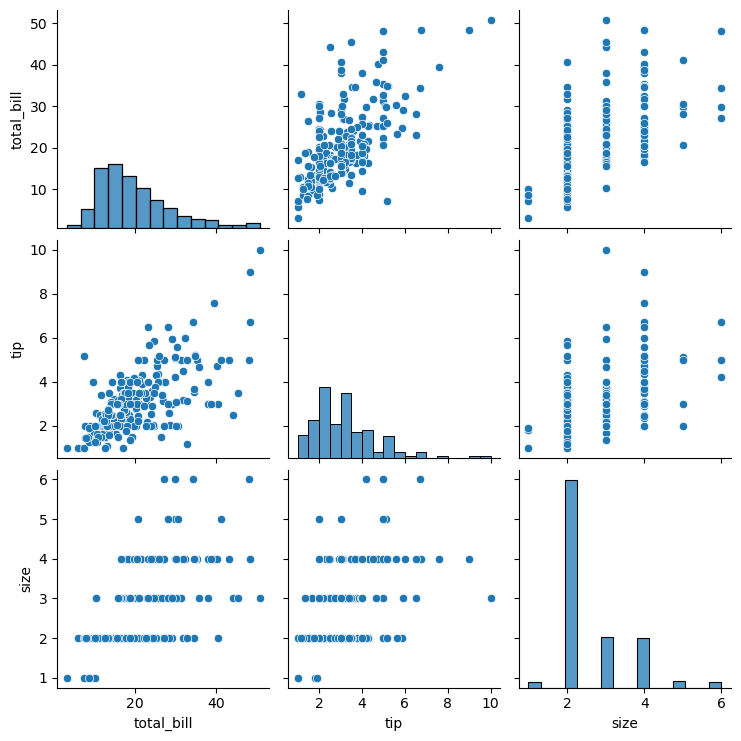

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# In[2]:


import warnings
warnings.filterwarnings(action='ignore')


# In[5]:


titanic = sns.load_dataset("titanic")
print(type(titanic))
titanic.to_csv("titanic.csv", index = False)


# In[8]:


titanic.isnull().sum()


# In[7]:


titanic['age'] = titanic['age'].fillna(titanic['age'].median())


# In[9]:


titanic['embarked'].value_counts()


# In[10]:


titanic['embarked'] = titanic['embarked'].fillna('S')


# In[11]:


titanic['embark_town'].value_counts()


# In[12]:


titanic['embark_town'] = titanic['embark_town'].fillna("Southampton")


# In[13]:


titanic['deck'].value_counts()


# In[14]:


titanic['deck'] = titanic['deck'].fillna('C')


# In[15]:


titanic.isnull().sum()


# In[16]:


titanic.info()


# In[17]:


titanic.survived.value_counts()


# In[20]:


f,ax = plt.subplots(1, 2, figsize = (10, 5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct= '%1.1f%%', ax =ax[0],shadow=True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct= '%1.1f%%', ax =ax[1],shadow=True)

ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')

plt.show()


# In[22]:


sns.countplot('pclass', hue='survived', data=titanic)
plt.title('Pcalss vs Survived')
plt.show()


# In[23]:


titanic_corr= titanic.corr(method='pearson')
titanic_corr


# In[25]:


titanic_corr.to_csv('titanic_corr.csv')


# In[26]:


titanic['survived'].corr(titanic['adult_male'])


# In[27]:


titanic['survived'].corr(titanic['fare'])


# In[32]:


titanic.head()


# In[50]:


sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')


# In[52]:


def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


# In[37]:


titanic['age2'] = titanic['age'].apply(category_age)


# In[38]:


titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})


# In[40]:


titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.to_csv('./titanic3.csv', index = False)


# In[41]:


heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]


# In[57]:


colormap = plt.cm.hot

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,
annot_kws = {"size": 10})

plt.show()


# In[48]:


tips = sns.load_dataset('tips')
sns.pairplot(tips)
plt.show()


# In[ ]:




